In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
# initializing empty array for storing dates and stock prices
dates = []
prices = []

In [3]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        data = csv.reader(csvfile)
        next(data) # to skip row 1
        for row in data:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[4]))
    return

In [4]:
def predict(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1))
    
    svr_lin = SVR(kernel = 'linear', C=1e3)
    svr_poly = SVR(kernel = 'poly', C=1e3, degree = 2)
    svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.1)
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF Model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear Model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial Model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

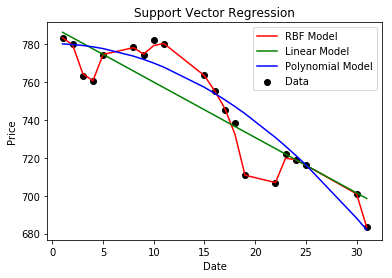

(723.20065214612043, 704.41052631548325, 694.21521740101264)


In [5]:
get_data('SENSEX1.csv')
predicted_price = predict(dates, prices, 29)
print predicted_price